<a href="https://colab.research.google.com/github/1212-site/Thesis/blob/main/Monte_Carlo_X_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library & Data

In [ ]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import calendar
from datetime import date, timedelta

from matplotlib import pyplot as plt
from google.colab import files
from matplotlib.ticker import ScalarFormatter
import plotly.express as px
import itertools

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import warnings
plt.style.use('fivethirtyeight')

In [ ]:
up = files.upload()

Saving daily.xlsx to daily.xlsx


In [ ]:
df = pd.read_excel('daily.xlsx', sheet_name=0)
# df = df.drop(0, axis=0)
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df['Tanggal'] = df['Tanggal'].dt.normalize()

df['Tanggal'] = df['Tanggal'].dt.floor('D')
df.head()

,Tanggal,Pendapatan
0,2022-01-01,3100000
1,2022-01-02,2100000
2,2022-01-03,1650000
3,2022-01-04,1400000
4,2022-01-05,1000000


In [ ]:
df.isnull().sum()

Tanggal       0
Pendapatan    0
dtype: int64

In [ ]:
duplicate_values = df.duplicated()
print(duplicate_values.sum())

0


In [ ]:
month = []
for i in range(1,365):
  m = i
  month.append(m)

In [ ]:
import plotly.express as px
figure = px.line(df, x="Tanggal", y="Pendapatan", title="Penjualan per-hari")
figure.show()

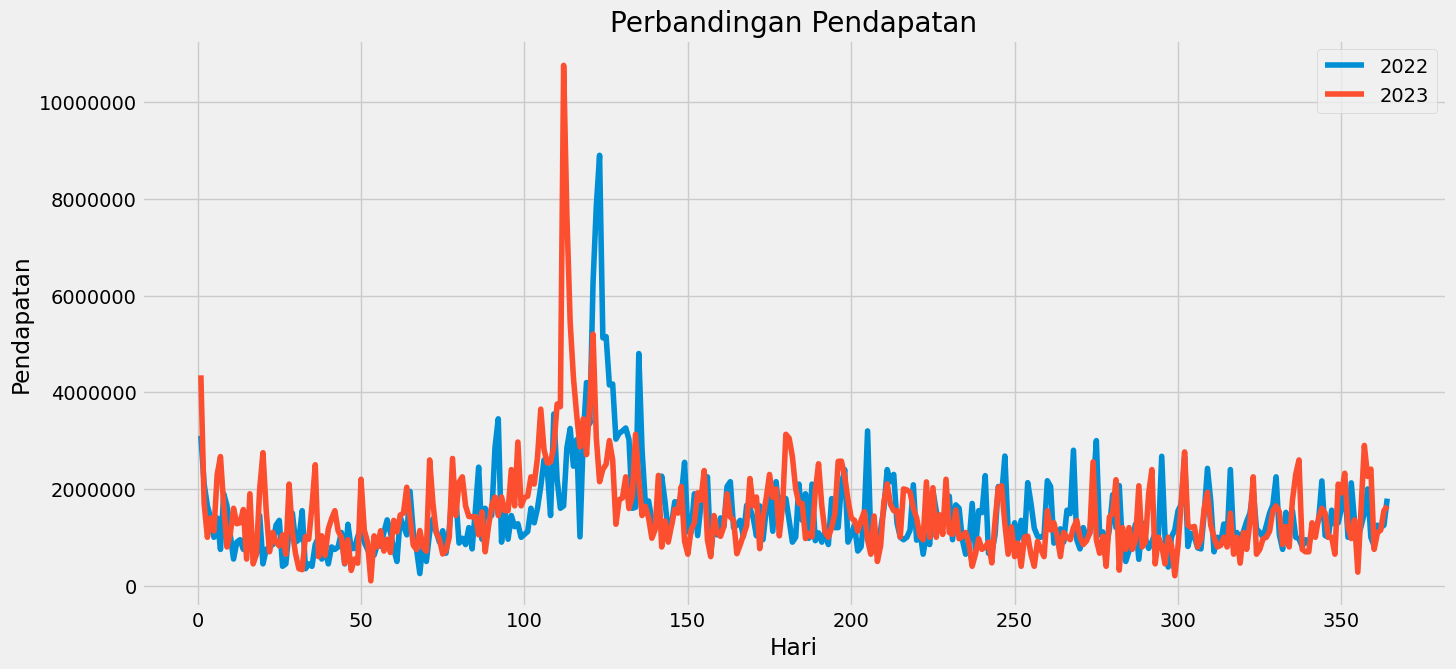

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

x = month
y = df['Pendapatan'].loc[0:363]
plt.plot(x,y)

x1 = month
y1 = df['Pendapatan'].loc[364:727]
plt.plot(x1,y1)


plt.xlabel("Hari")
plt.ylabel("Pendapatan")
plt.title('Perbandingan Pendapatan')
plt.legend(['2022','2023'])
plt.show()

## Monte Carlo

## Penghitungan interval

In [ ]:
total = df['Pendapatan'].sum()
total

1080384000

In [ ]:
pd.options.display.float_format = '{:.4f}'.format
dp = df['Pendapatan'] / total
dp.head(6)

0   0.0029
1   0.0019
2   0.0015
3   0.0013
4   0.0009
5   0.0013
Name: Pendapatan, dtype: float64

In [ ]:
pd.options.display.float_format = '{:.4f}'.format
DPt = pd.DataFrame(df)
DPt['DP'] = dp
DPt

,Tanggal,Pendapatan,DP
0,2022-01-01,3100000,0.0029
1,2022-01-02,2100000,0.0019
2,2022-01-03,1650000,0.0015
3,2022-01-04,1400000,0.0013
4,2022-01-05,1000000,0.0009
...,...,...,...
724,2023-12-27,1090000,0.0010
725,2023-12-28,1150000,0.0011
726,2023-12-29,1550000,0.0014
727,2023-12-30,1650000,0.0015


In [ ]:
start = dp[0]
dpk = [start]
temp = dp[0]
for i in range(0,728):
  temp = temp + dp[i+1]
  dpk.append(temp)
dpk #15dgt

[0.0028693501569812215,
 0.004813103489129791,
 0.006340338250103667,
 0.00763617380486938,
 0.008561770629702032,
 0.009857606184467745,
 0.010551803803092234,
 0.012310437770274272,
 0.013837672531248148,
 0.014809549197322433,
 0.015318627450980392,
 0.016151664593329777,
 0.017030981576920796,
 0.017725179195545285,
 0.018789615544102835,
 0.019992891416385283,
 0.02081667259048634,
 0.021418310526627564,
 0.02276042592263491,
 0.023176944493809602,
 0.02387114211243409,
 0.024611619572300212,
 0.025398376873407968,
 0.026555372904448784,
 0.027804928617972863,
 0.028175167347905924,
 0.028591685919080616,
 0.029656122267638165,
 0.031044517504887143,
 0.03187755464723653,
 0.03275687163082755,
 0.03419154670931816,
 0.03451550559800959,
 0.034932024169184284,
 0.035302262899117344,
 0.0360890202002251,
 0.037014617025057754,
 0.03752369527871571,
 0.038217892897340205,
 0.0386344114685149,
 0.03937488892838102,
 0.040069086547005514,
 0.040809564006871635,
 0.04182772051418755,
 0

In [ ]:
pd.options.display.float_format = '{:.4f}'.format
DPkt = pd.DataFrame(df)
DPkt['DP'] = dp
DPkt['DPK'] = dpk
DPkt['DPK'].replace(to_replace=0.9990744031751668, value=1)
DPkt

,Tanggal,Pendapatan,DP,DPK
0,2022-01-01,3100000,0.0029,0.0029
1,2022-01-02,2100000,0.0019,0.0048
2,2022-01-03,1650000,0.0015,0.0063
3,2022-01-04,1400000,0.0013,0.0076
4,2022-01-05,1000000,0.0009,0.0086
...,...,...,...,...
724,2023-12-27,1090000,0.0010,0.9934
725,2023-12-28,1150000,0.0011,0.9944
726,2023-12-29,1550000,0.0014,0.9959
727,2023-12-30,1650000,0.0015,0.9974


In [ ]:
intervalstr = [0]
intervalend = []
for i in range(0,729):
  tmp = (dpk[i]*1000)
  intervalend.append(tmp)
  intervalstr.append(tmp+0.0000000000001)
  if tmp > 999:
    intervalstr.remove(intervalstr[i+1])
intervalstr

[0,
 2.8693501569813216,
 4.813103489129892,
 6.340338250103767,
 7.636173804869481,
 8.561770629702131,
 9.857606184467844,
 10.551803803092334,
 12.31043777027437,
 13.837672531248248,
 14.809549197322532,
 15.318627450980491,
 16.151664593329876,
 17.030981576920897,
 17.725179195545383,
 18.789615544102933,
 19.992891416385383,
 20.81667259048644,
 21.418310526627664,
 22.760425922635008,
 23.176944493809703,
 23.871142112434192,
 24.611619572300313,
 25.39837687340807,
 26.555372904448884,
 27.804928617972962,
 28.175167347906022,
 28.591685919080714,
 29.656122267638263,
 31.044517504887242,
 31.87755464723663,
 32.756871630827646,
 34.19154670931826,
 34.51550559800969,
 34.93202416918438,
 35.302262899117444,
 36.0890202002252,
 37.01461702505785,
 37.52369527871581,
 38.217892897340306,
 38.634411468515,
 39.37488892838112,
 40.06908654700561,
 40.80956400687173,
 41.827720514187654,
 42.244239085362345,
 43.419747052899815,
 44.12782862389679,
 44.84053817901793,
 45.78001895

In [ ]:
intervalend

[2.8693501569812216,
 4.813103489129792,
 6.340338250103667,
 7.63617380486938,
 8.561770629702032,
 9.857606184467745,
 10.551803803092234,
 12.310437770274271,
 13.837672531248149,
 14.809549197322433,
 15.318627450980392,
 16.151664593329777,
 17.030981576920798,
 17.725179195545284,
 18.789615544102833,
 19.992891416385284,
 20.81667259048634,
 21.418310526627565,
 22.76042592263491,
 23.176944493809604,
 23.871142112434093,
 24.611619572300214,
 25.39837687340797,
 26.555372904448785,
 27.804928617972863,
 28.175167347905923,
 28.591685919080614,
 29.656122267638164,
 31.044517504887143,
 31.87755464723653,
 32.75687163082755,
 34.19154670931816,
 34.51550559800959,
 34.93202416918428,
 35.302262899117345,
 36.0890202002251,
 37.01461702505775,
 37.523695278715714,
 38.21789289734021,
 38.6344114685149,
 39.37488892838102,
 40.06908654700551,
 40.80956400687163,
 41.827720514187554,
 42.244239085362246,
 43.419747052899716,
 44.12782862389669,
 44.840538179017834,
 45.780018956222

In [ ]:
hasiln = pd.DataFrame(df)
hasiln['DP'] = pd.DataFrame(dp)
hasiln['DPK'] = dpk
hasiln['Start'] = intervalstr
hasiln['end'] = intervalend
hasiln

,Tanggal,Pendapatan,DP,DPK,Start,end
0,2022-01-01,3100000,0.0029,0.0029,0.0000,2.8694
1,2022-01-02,2100000,0.0019,0.0048,2.8694,4.8131
2,2022-01-03,1650000,0.0015,0.0063,4.8131,6.3403
3,2022-01-04,1400000,0.0013,0.0076,6.3403,7.6362
4,2022-01-05,1000000,0.0009,0.0086,7.6362,8.5618
...,...,...,...,...,...,...
724,2023-12-27,1090000,0.0010,0.9934,992.3731,993.3820
725,2023-12-28,1150000,0.0011,0.9944,993.3820,994.4464
726,2023-12-29,1550000,0.0014,0.9959,994.4464,995.8811
727,2023-12-30,1650000,0.0015,0.9974,995.8811,997.4083


from matplotlib import pyplot as plt
hasiln['Pendapatan'].plot(kind='hist', bins=20, title='Pendapatan')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hasiln['DP'].plot(kind='hist', bins=20, title='DP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hasiln['DPK'].plot(kind='hist', bins=20, title='DPK')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hasiln['Start'].plot(kind='hist', bins=20, title='Start')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hasiln.plot(kind='scatter', x='Pendapatan', y='DP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hasiln.plot(kind='scatter', x='DP', y='DPK', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hasiln.plot(kind='scatter', x='DPK', y='Start', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
hasiln.plot(kind='scatter', x='Start', y='end', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Tanggal']
  ys = series['Pendapatan']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = hasiln.sort_values('Tanggal', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tanggal')
_ = plt.ylabel('Pendapatan')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Tanggal']
  ys = series['DP']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = hasiln.sort_values('Tanggal', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tanggal')
_ = plt.ylabel('DP')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Tanggal']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Tanggal'}, axis=1)
              .sort_values('Tanggal', ascending=True))
  xs = counted['Tanggal']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = hasiln.sort_values('Tanggal', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tanggal')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DPK']
  ys = series['Pendapatan']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = hasiln.sort_values('DPK', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DPK')
_ = plt.ylabel('Pendapatan')

from matplotlib import pyplot as plt
hasiln['Pendapatan'].plot(kind='line', figsize=(8, 4), title='Pendapatan')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
hasiln['DP'].plot(kind='line', figsize=(8, 4), title='DP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
hasiln['DPK'].plot(kind='line', figsize=(8, 4), title='DPK')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
hasiln['Start'].plot(kind='line', figsize=(8, 4), title='Start')
plt.gca().spines[['top', 'right']].set_visible(False)

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## Penentuan Angka Acak

In [ ]:
dfn = pd.DataFrame(df['Tanggal'].loc[364:727])
dfn['Tanggal'] = dfn['Tanggal'].dt.strftime('%d-%m')

In [ ]:
dfn.reset_index(drop=True, inplace=True)
dfn

,Tanggal
0,01-01
1,02-01
2,03-01
3,04-01
4,05-01
...,...
359,26-12
360,27-12
361,28-12
362,29-12


In [ ]:
import random
angka = []
for i in range(0,364):
  temp = random.uniform(0, 999)
  angka.append(temp)

In [ ]:
dfn['Angka Acak'] = angka
dfn

,Tanggal,Angka Acak
0,01-01,433.2771
1,02-01,578.2344
2,03-01,677.8711
3,04-01,134.1357
4,05-01,859.3057
...,...,...
359,26-12,51.4100
360,27-12,857.4025
361,28-12,398.4343
362,29-12,556.1157


## Algoritma filtering monte-carlo berdasarkan interval

In [ ]:
angka[0]

433.2771075996992

In [ ]:
def filtering(number):
  for i in range(0,729):
    if number < hasiln['end'].loc[i]:
      return hasiln['Pendapatan'].loc[i]

# ===============================

prediksi = []
for i in range(0,364):
  pred = filtering(angka[i])
  prediksi.append(pred)
prediksi

[1275000,
 964000,
 3450000,
 3020000,
 400000,
 2400000,
 2665000,
 800000,
 2600000,
 1150000,
 1950000,
 1550000,
 7640000,
 2150000,
 1650000,
 1900000,
 1900000,
 5125000,
 1175000,
 1020000,
 850000,
 1300000,
 1550000,
 1050000,
 2200000,
 1060000,
 1110000,
 2405000,
 4200000,
 4800000,
 1110000,
 1000000,
 1300000,
 1340000,
 1650000,
 1600000,
 1350000,
 1550000,
 2085000,
 1600000,
 1175000,
 1550000,
 1080000,
 670000,
 3050000,
 2100000,
 2035000,
 1900000,
 800000,
 1965000,
 1300000,
 1010000,
 3020000,
 1650000,
 3130000,
 2325000,
 1833000,
 1300000,
 1450000,
 2300000,
 1510000,
 1000000,
 2300000,
 1735000,
 2600000,
 1950000,
 745000,
 2300000,
 3130000,
 1300000,
 1650000,
 2536000,
 1920000,
 770000,
 770000,
 1400000,
 1350000,
 5200000,
 1175000,
 2025000,
 1010000,
 5125000,
 1600000,
 2555000,
 1150000,
 2100000,
 2100000,
 4300000,
 2250000,
 1110000,
 2050000,
 650000,
 970000,
 1100000,
 3130000,
 2150000,
 650000,
 1200000,
 3020000,
 1575000,
 1450000,
 9

In [ ]:
table_monaco = dfn
table_monaco['Prediksi'] = prediksi
table_monaco

,Tanggal,Angka Acak,Prediksi
0,01-01,433.2771,1275000
1,02-01,578.2344,964000
2,03-01,677.8711,3450000
3,04-01,134.1357,3020000
4,05-01,859.3057,400000
...,...,...,...
359,26-12,51.4100,1100000
360,27-12,857.4025,1100000
361,28-12,398.4343,2070000
362,29-12,556.1157,1030000


## Visualisasi Perbandingan Monte Carlo

In [ ]:
dataril = hasiln.drop(['DP', 'DPK'], axis=1)
dataril

,Tanggal,Pendapatan,Start,end
0,2022-01-01,3100000,0.0000,2.8694
1,2022-01-02,2100000,2.8694,4.8131
2,2022-01-03,1650000,4.8131,6.3403
3,2022-01-04,1400000,6.3403,7.6362
4,2022-01-05,1000000,7.6362,8.5618
...,...,...,...,...
724,2023-12-27,1090000,992.3731,993.3820
725,2023-12-28,1150000,993.3820,994.4464
726,2023-12-29,1550000,994.4464,995.8811
727,2023-12-30,1650000,995.8811,997.4083


In [ ]:
table_monaco

,Tanggal,Angka Acak,Prediksi
0,01-01,433.2771,1275000
1,02-01,578.2344,964000
2,03-01,677.8711,3450000
3,04-01,134.1357,3020000
4,05-01,859.3057,400000
...,...,...,...
359,26-12,51.4100,1100000
360,27-12,857.4025,1100000
361,28-12,398.4343,2070000
362,29-12,556.1157,1030000


In [ ]:
pp2023 = df['Pendapatan'].loc[0:363].reset_index(drop=True)
pp2022 = df['Pendapatan'].loc[364:727].reset_index(drop=True)

In [ ]:
data = pd.DataFrame(df['Tanggal'].loc[364:727])
data.reset_index(drop=True, inplace=True)
data['Pendapatan_2022'] = pp2022
data['Pendapatan_2023'] = pp2023
data['Pendapatan_2024'] = table_monaco['Prediksi']
data

,Tanggal,Pendapatan_2022,Pendapatan_2023,Pendapatan_2024
0,2023-01-01,4350000,3100000,1275000
1,2023-01-02,1700000,2100000,964000
2,2023-01-03,1000000,1650000,3450000
3,2023-01-04,1400000,1400000,3020000
4,2023-01-05,1130000,1000000,400000
...,...,...,...,...
359,2023-12-26,750000,820000,1100000
360,2023-12-27,1090000,1250000,1100000
361,2023-12-28,1150000,1200000,2070000
362,2023-12-29,1550000,1250000,1030000


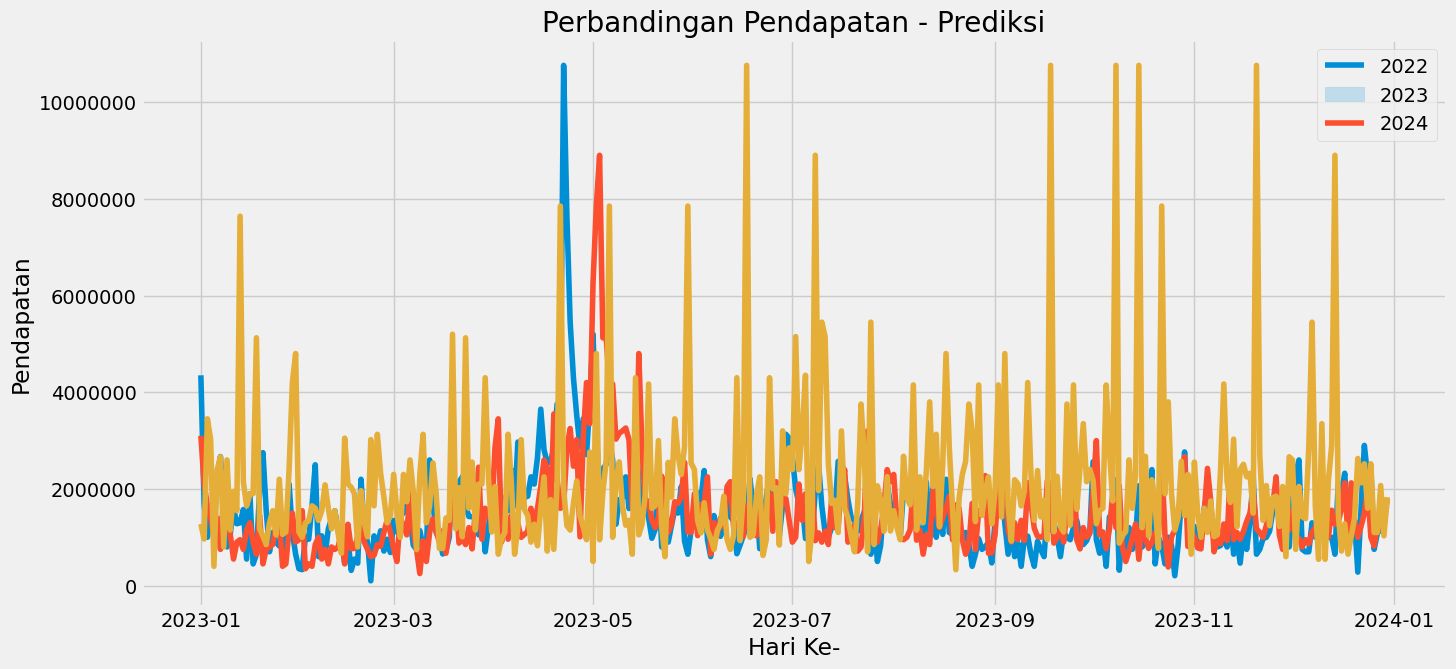

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

sns.lineplot(data=data, x="Tanggal", y="Pendapatan_2022")
sns.lineplot(data=data, x="Tanggal", y="Pendapatan_2023")
sns.lineplot(data=data, x="Tanggal", y="Pendapatan_2024")

plt.xlabel("Hari Ke-")
plt.ylabel("Pendapatan")
plt.title('Perbandingan Pendapatan - Prediksi')
plt.legend(['2022','2023','2024'])
plt.show()

In [ ]:
ind = []
for i in range(729,1093):
  temp = i
  ind.append(temp)
ser = pd.Series(prediksi, index=ind)

<Axes: >

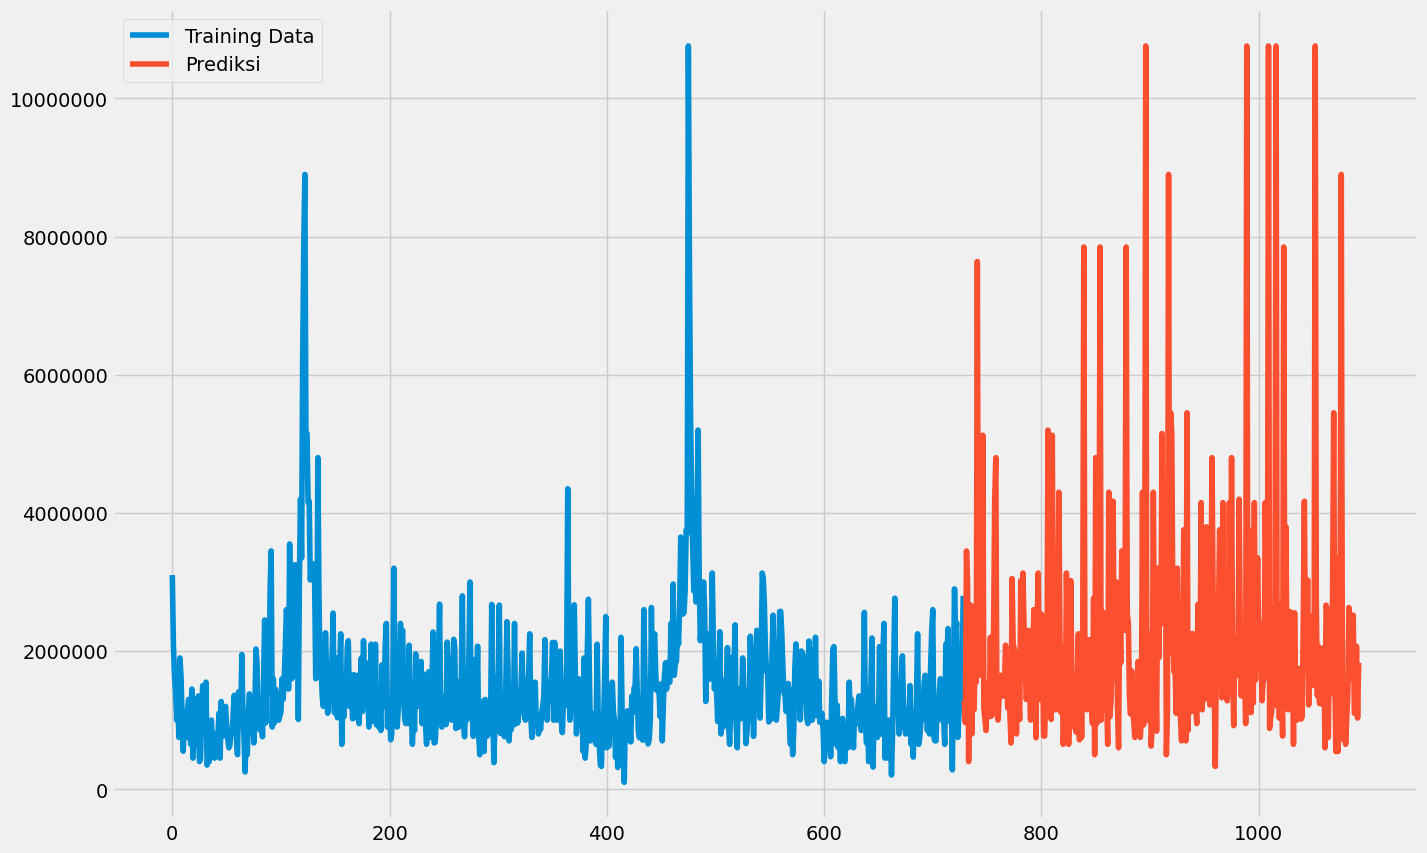

In [ ]:
plt.ticklabel_format(style='plain')
df['Pendapatan'].plot(legend=True, label="Training Data", figsize=(15,10))
ser.plot(legend=True, label="Prediksi")

# ARIMA

## Menghitung p value dan menentukan var p , d , q dengan auto-correlation


In [ ]:
from statsmodels.tsa.stattools import adfuller
adftest=adfuller(df["Pendapatan"])
print('p value adfuller test: ', adftest[1])

p value adfuller test:  0.000618846754103646


<Figure size 640x480 with 0 Axes>

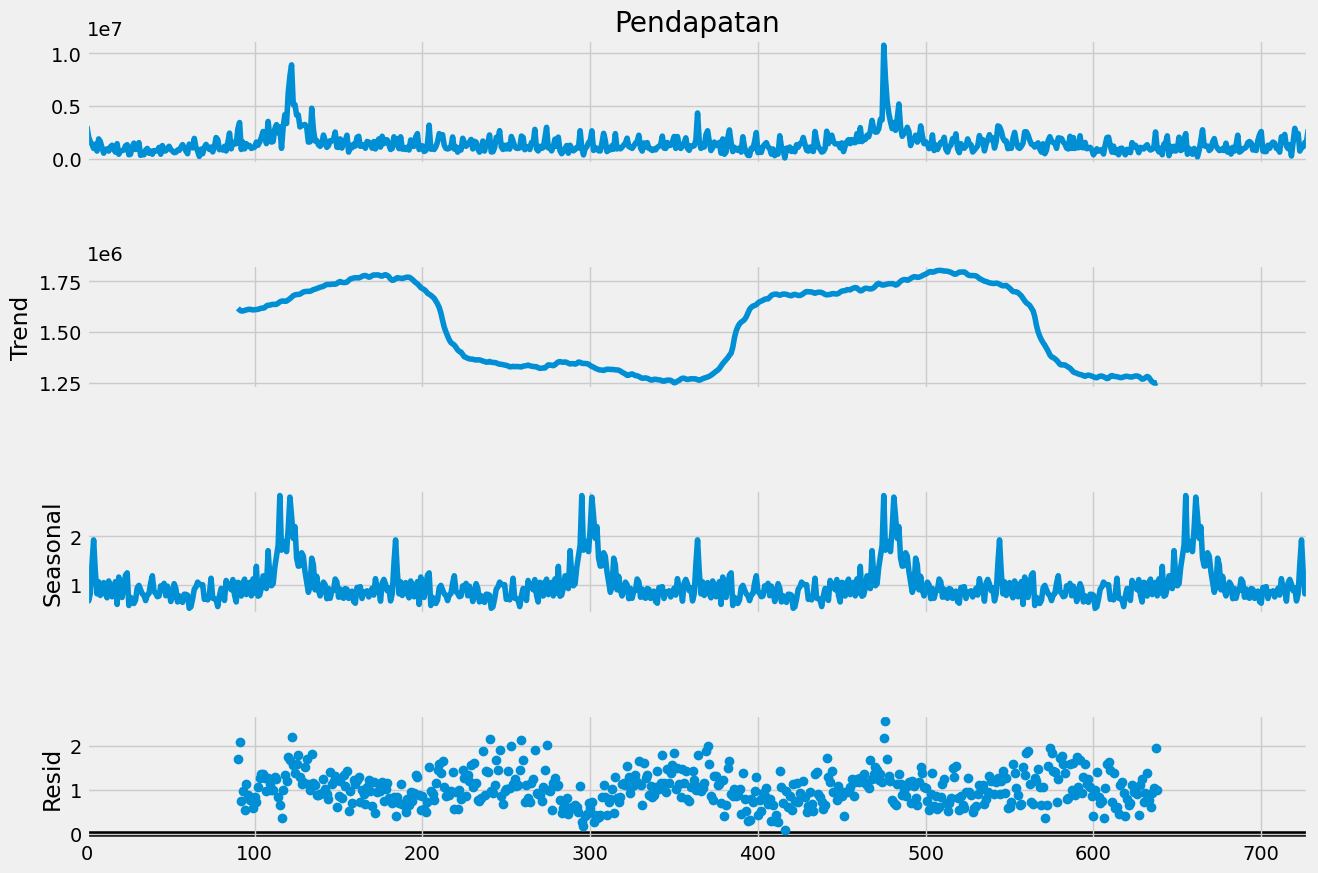

In [ ]:
result = seasonal_decompose(df["Pendapatan"], model='multiplicative', period=180)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

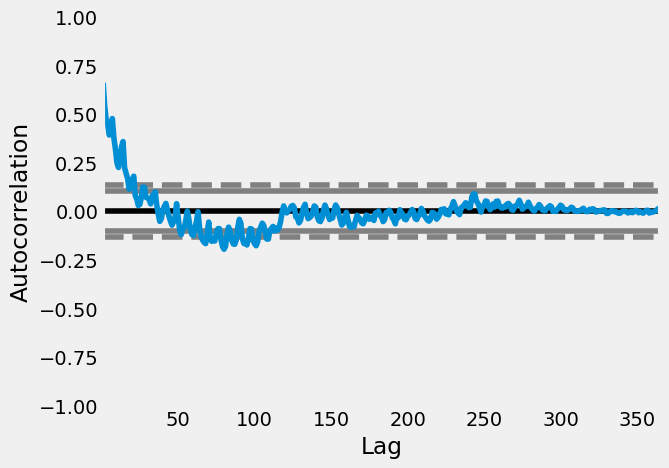

In [ ]:
pd.plotting.autocorrelation_plot(df['Pendapatan'].loc[0:364])

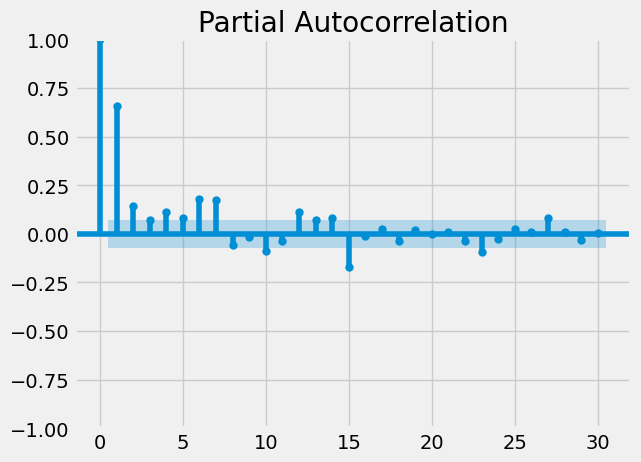

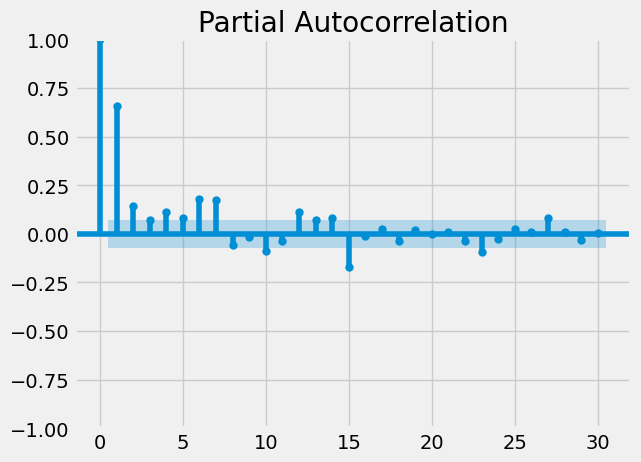

In [ ]:
plot_pacf(df["Pendapatan"], lags=30)

In [ ]:
train=df['Pendapatan'].loc[0:364]
test=df['Pendapatan'].loc[365:729]

In [ ]:
p = 5
d = 1
q = 2

## Pelatihan Model dan Proses Prediksi

In [ ]:
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

model = sm.tsa.statespace.SARIMAX(df['Pendapatan'], order=(p,d,q),seasonal_order=(p,d,q,12))

modeled = model.fit()
print(modeled.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                                     SARIMAX Results                                      
Dep. Variable:                         Pendapatan   No. Observations:                  729
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood              -10723.691
Date:                            Fri, 12 Jul 2024   AIC                          21477.382
Time:                                    08:53:12   BIC                          21545.987
Sample:                                         0   HQIC                         21503.874
                                            - 729                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7041      0.075      9.435      0.000       0.558       0.850
ar.L2         -0.6922      0.082   

In [ ]:
pred = modeled.predict(len(train), len(df)-1)

In [ ]:
pred

365   2824577.1279
366   1685499.6867
367   1316447.1467
368   1707223.6994
369   1420897.0517
          ...     
724   1332524.9353
725   1335400.5844
726   1545943.2235
727   1971069.7782
728   1836627.5348
Name: predicted_mean, Length: 364, dtype: float64

In [ ]:
pred = list(pred)
testing = pd.DataFrame(pred, columns=['Hasil'])
testing

,Hasil
0,2824577.1279
1,1685499.6867
2,1316447.1467
3,1707223.6994
4,1420897.0517
...,...
359,1332524.9353
360,1335400.5844
361,1545943.2235
362,1971069.7782


In [ ]:
test_am = pd.DataFrame(month, columns=['Hari-ke'])
test_am['Prediksi'] = testing['Hasil']

In [ ]:
pd.options.display.float_format = '{:.0f}'.format
test_am

,Hari-ke,Prediksi
0,1,2824577
1,2,1685500
2,3,1316447
3,4,1707224
4,5,1420897
...,...,...
359,360,1332525
360,361,1335401
361,362,1545943
362,363,1971070


## Visualisasi Perbandingan ARIMA

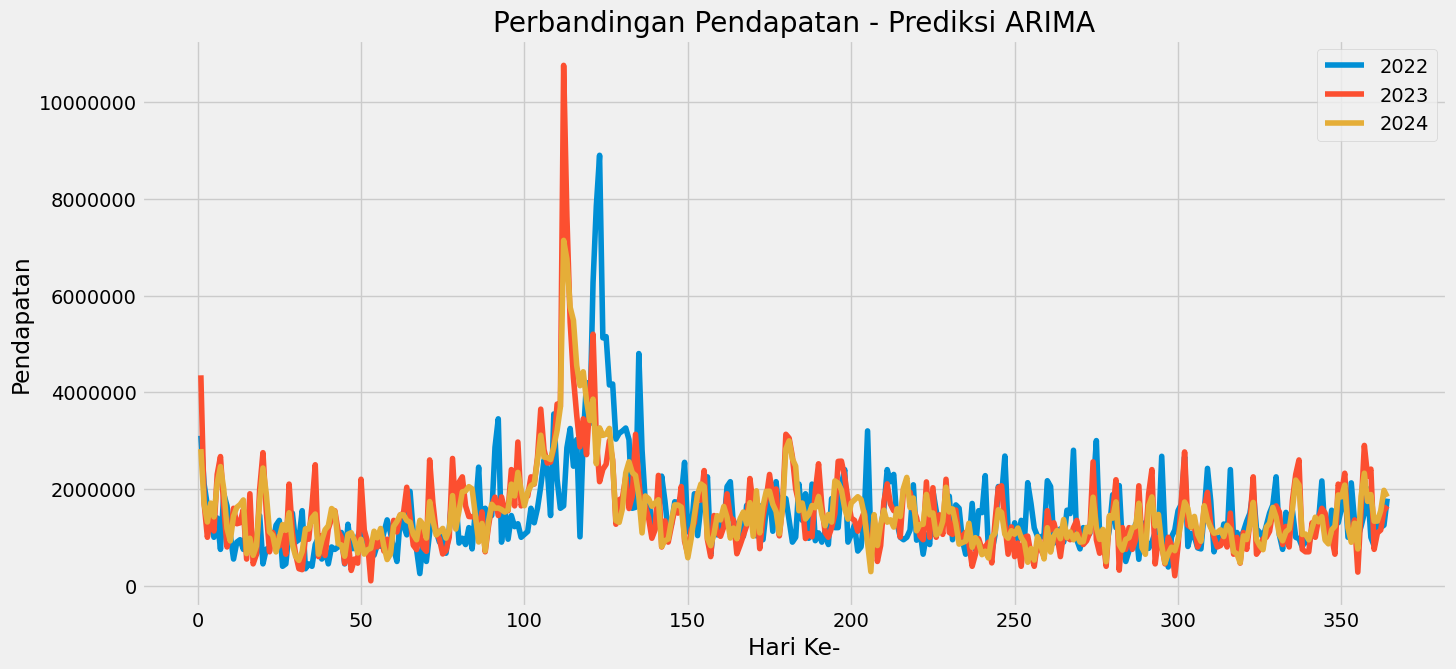

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

x = month
y = df['Pendapatan'].loc[0:363]
plt.plot(x,y)

x1 = month
y1 = df['Pendapatan'].loc[364:727]
plt.plot(x1,y1)

x2 = month
y2 = test_am['Prediksi']
plt.plot(x2,y2)

plt.xlabel("Hari Ke-")
plt.ylabel("Pendapatan")
plt.title('Perbandingan Pendapatan - Prediksi ARIMA')
plt.legend(['2022','2023','2024'])
plt.show()

In [ ]:
data = pd.DataFrame(df['Tanggal'].loc[364:727])
data.reset_index(drop=True, inplace=True)
data['Tanggal'] = data['Tanggal'].dt.strftime('%d-%m')
data['Pendapatan_2022'] = pp2022
data['Pendapatan_2023'] = pp2023
data['Pendapatan_2024'] = test_am['Prediksi']
data

,Tanggal,Pendapatan_2022,Pendapatan_2023,Pendapatan_2024
0,01-01,4350000,3100000,2824577
1,02-01,1700000,2100000,1685500
2,03-01,1000000,1650000,1316447
3,04-01,1400000,1400000,1707224
4,05-01,1130000,1000000,1420897
...,...,...,...,...
359,26-12,750000,820000,1332525
360,27-12,1090000,1250000,1335401
361,28-12,1150000,1200000,1545943
362,29-12,1550000,1250000,1971070


In [ ]:
ind = []
for i in range(729,1093):
  temp = i
  ind.append(temp)
ser = pd.Series(pred, index=ind)

<Axes: >

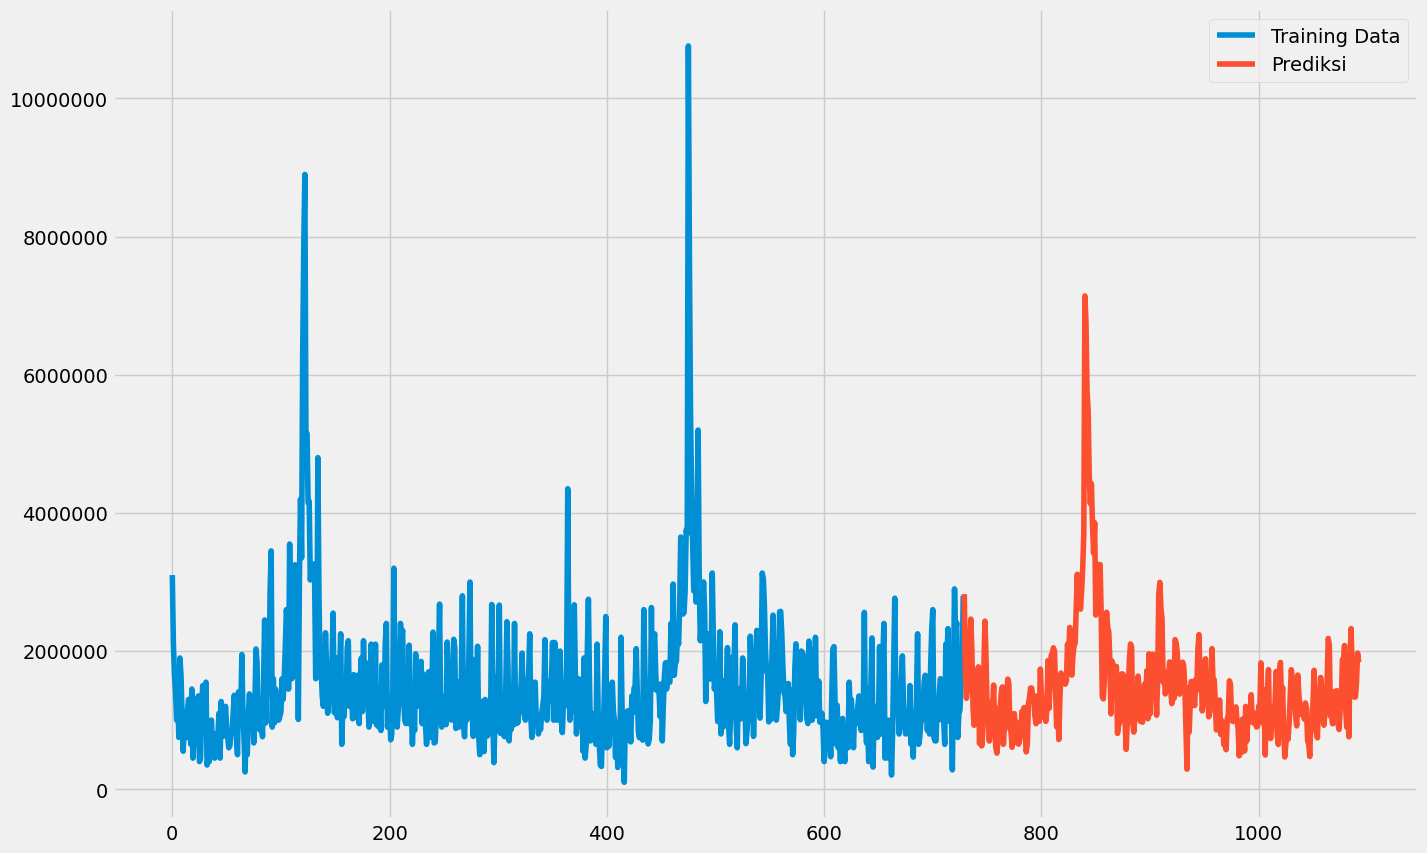

In [ ]:
plt.ticklabel_format(style='plain')
df['Pendapatan'].plot(legend=True, label="Training Data", figsize=(15,10))
ser.plot(legend=True, label="Prediksi")

# Evaluasi dan Perbandingan

In [ ]:
dfnew = pd.DataFrame(df)
dfnew

,Tanggal,Pendapatan
0,2022-01-01,3100000
1,2022-01-02,2100000
2,2022-01-03,1650000
3,2022-01-04,1400000
4,2022-01-05,1000000
...,...,...
724,2023-12-27,1090000
725,2023-12-28,1150000
726,2023-12-29,1550000
727,2023-12-30,1650000


In [ ]:
x = np.arange(1,730)
n = 730
x_ttl = x.sum()
y = dfnew['Pendapatan']

In [ ]:
rt_y = []
for i in range(0,364):
  tmp = (y[i]+y[i+364])/2
  rt_y.append(tmp)

## Monte Carlo

In [ ]:
test_mc = pd.DataFrame(month, columns=['Hari-ke'])
test_mc['Rata-Rata Penjualan'] = rt_y
test_mc['Prediksi'] = prediksi
test_mc

,Hari-ke,Rata-Rata Penjualan,Prediksi
0,1,3725000,1275000
1,2,1900000,964000
2,3,1325000,3450000
3,4,1400000,3020000
4,5,1065000,400000
...,...,...,...
359,360,785000,1100000
360,361,1170000,1100000
361,362,1175000,2070000
362,363,1400000,1030000


In [ ]:
mae_mc = []
for i in range(0,364):
  tmp = abs((rt_y[i]-prediksi[i]))
  mae_mc.append(tmp)
test_mc['MAE'] = mae_mc
test_mc

,Hari-ke,Rata-Rata Penjualan,Prediksi,MAE
0,1,3725000,1275000,2450000
1,2,1900000,964000,936000
2,3,1325000,3450000,2125000
3,4,1400000,3020000,1620000
4,5,1065000,400000,665000
...,...,...,...,...
359,360,785000,1100000,315000
360,361,1170000,1100000,70000
361,362,1175000,2070000,895000
362,363,1400000,1030000,370000


In [ ]:
maesummc = test_mc['MAE'].sum()
mcsummc = test_mc['Prediksi'].sum()
mapemc = 1/n*(maesummc/mcsummc)*100

In [ ]:
print('Total Prediksi : ', mcsummc)
print('Total MAE : ', maesummc)
print('MAPE : ', mapemc)

Total Prediksi :  795409000
Total MAE :  457539000.0
MAPE :  0.07879792074576193


### ARIMA

In [ ]:
test_arim = pd.DataFrame(month, columns=['Hari-ke'])
test_arim['Rata-Rata Penjualan'] = rt_y
test_arim['Prediksi'] = test_am['Prediksi']
test_arim

,Hari-ke,Rata-Rata Penjualan,Prediksi
0,1,3725000,2824577
1,2,1900000,1685500
2,3,1325000,1316447
3,4,1400000,1707224
4,5,1065000,1420897
...,...,...,...
359,360,785000,1332525
360,361,1170000,1335401
361,362,1175000,1545943
362,363,1400000,1971070


In [ ]:
mae_am = []
for i in range(0,364):
  tmp = abs((rt_y[i]-test_am['Prediksi'].loc[i]))
  mae_am.append(tmp)
test_am['MAE'] = mae_am
test_am

,Hari-ke,Prediksi,MAE
0,1,2824577,900423
1,2,1685500,214500
2,3,1316447,8553
3,4,1707224,307224
4,5,1420897,355897
...,...,...,...
359,360,1332525,547525
360,361,1335401,165401
361,362,1545943,370943
362,363,1971070,571070


In [ ]:
maesumam = test_am['MAE'].sum()
mcsumam = test_am['Prediksi'].sum()
mapeam = 1/n*(maesumam/mcsumam)*100

In [ ]:
print('Total Prediksi : ', mcsumam)
print('Total MAE : ', maesumam)
print('MAPE : ', mapeam)

Total Prediksi :  543372374.9021109
Total MAE :  134869134.9082433
MAPE :  0.03400103651452958


### Visualisasi Perbandingan Monte dan ARIMA

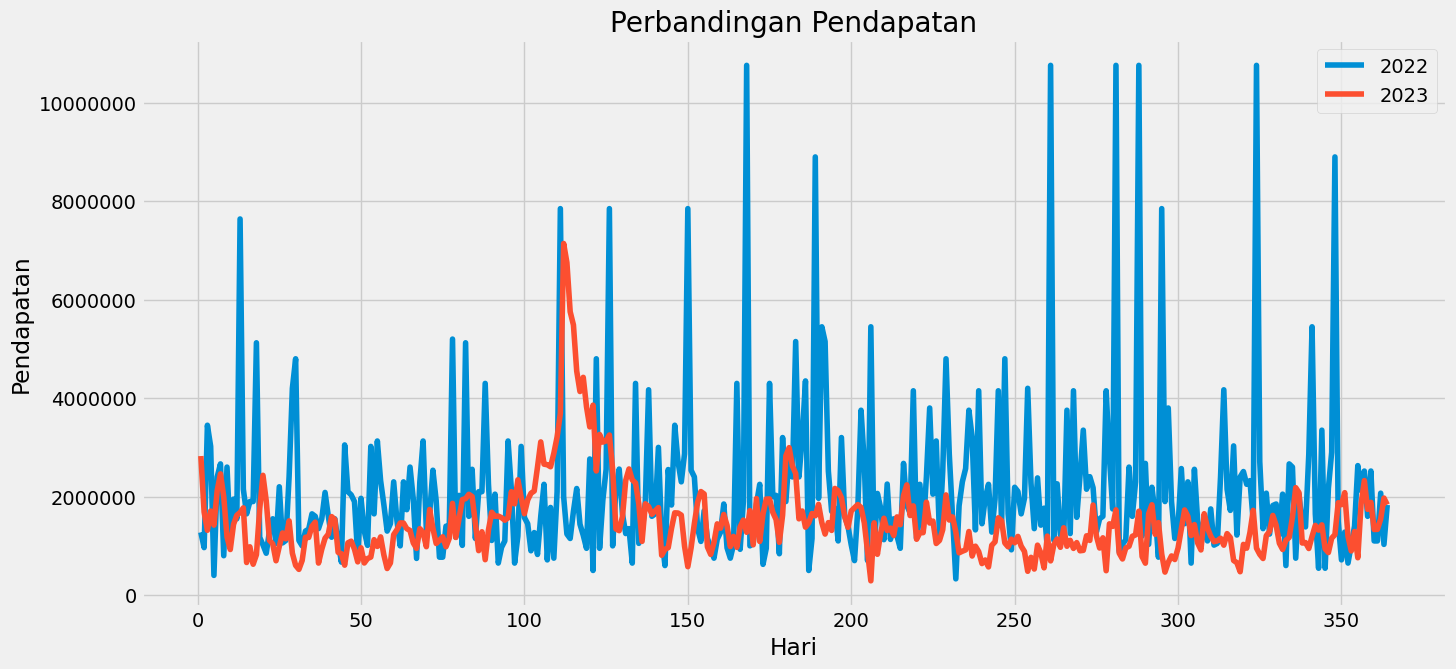

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

x = test_mc['Hari-ke']
y = test_mc['Prediksi']
plt.plot(x,y)

x1 = test_mc['Hari-ke']
y1 = test_arim['Prediksi']
plt.plot(x1,y1)


plt.xlabel("Hari")
plt.ylabel("Pendapatan")
plt.title('Perbandingan Pendapatan')
plt.legend(['2022','2023'])
plt.show()